In [ ]:

 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d pcbreviglieri/smart-grid-stability

Dataset URL: https://www.kaggle.com/datasets/pcbreviglieri/smart-grid-stability
License(s): copyright-authors
 48% 3.00M/6.30M [00:00<00:00, 5.45MB/s]
100% 6.30M/6.30M [00:00<00:00, 8.53MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/smart-grid-stability.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv('/content/smart_grid_stability_augmented.csv')

In [ ]:
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  4.329398  2.922381  3.812439  4.889527  2.976282 -0.580791 -1.670782   
1  1.505885  3.894798  9.429076  9.028299  4.539770 -1.944415 -1.306711   
2  5.676195  1.589124  4.374007  9.746163  2.490323 -1.124102 -0.835475   
3  6.599849  3.272397  6.788573  4.996733  4.176063 -0.940304 -1.384814   
4  8.318815  9.943342  1.992320  7.010092  4.588462 -1.772568 -1.149099   

         p4        g1        g2        g3        g4      stab     stabf  
0 -0.724708  0.081347  0.931304  0.416173  0.359207  0.001675  unstable  
1 -1.288644  0.931961  0.651021  0.357534  0.309457 -0.031472    stable  
2 -0.530746  0.472828  0.658319  0.116294  0.324219 -0.029357    stable  
3 -1.850945  0.409672  0.269575  0.863755  0.284555  0.037729  unstable  
4 -1.666795  0.269630  0.302074  0.219025  0.440237 -0.001916    stable

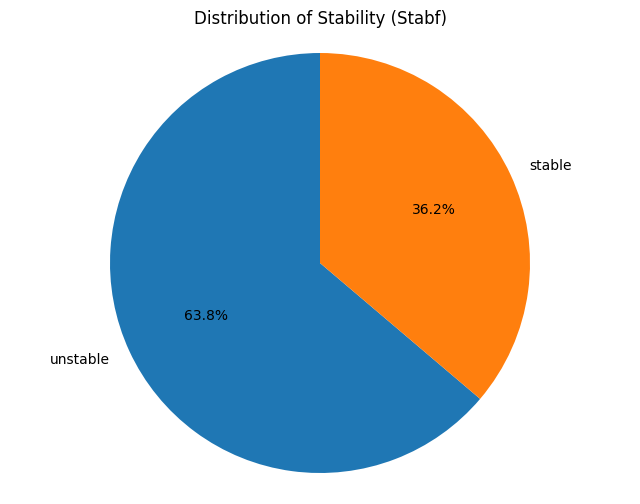

In [ ]:
stabf_counts = data['stabf'].value_counts()

plt.figure(figsize = (8,6))
plt.pie(stabf_counts, labels = stabf_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Stability (Stabf)')
plt.axis('equal')
plt.show()

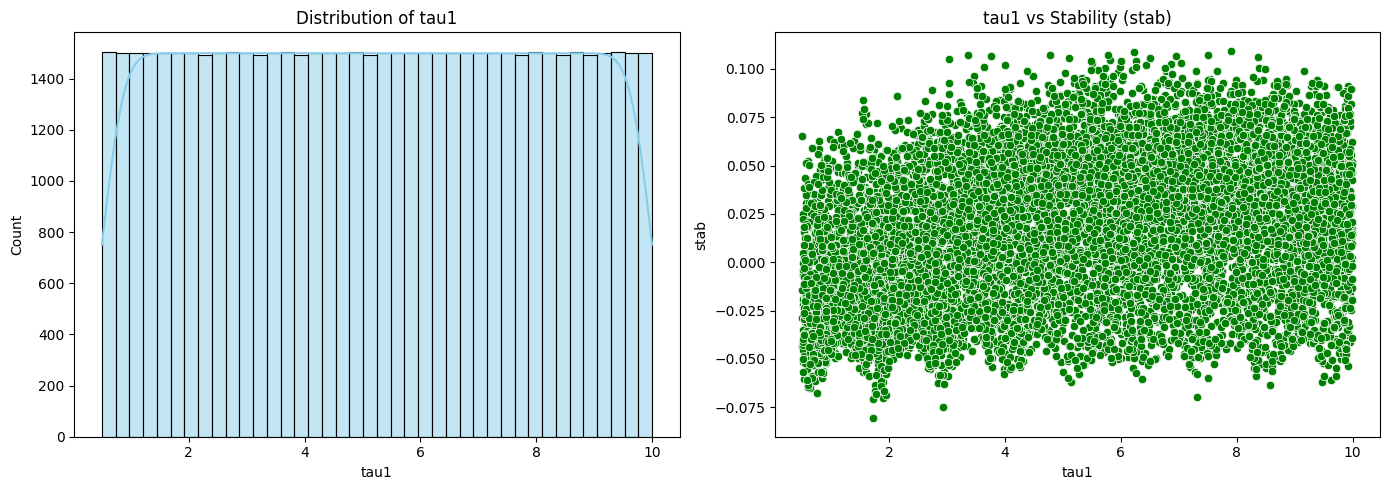

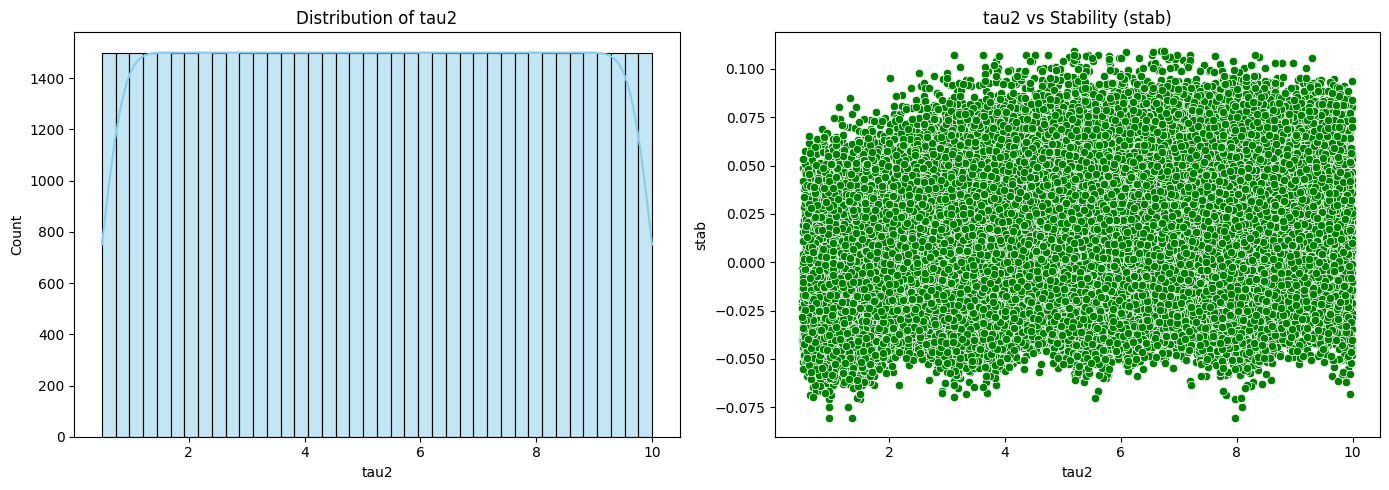

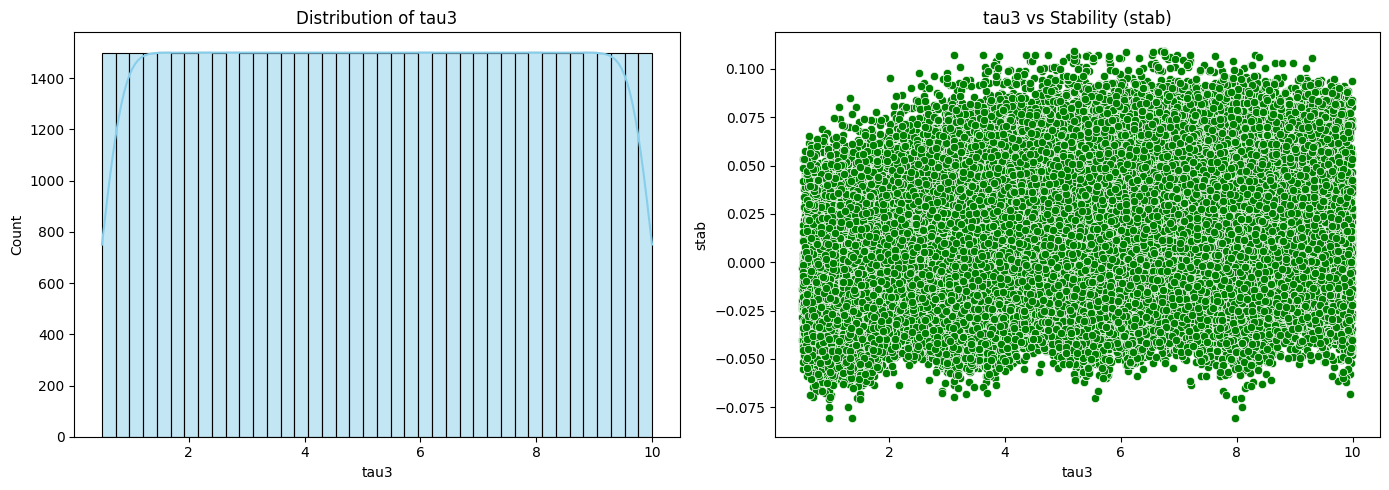

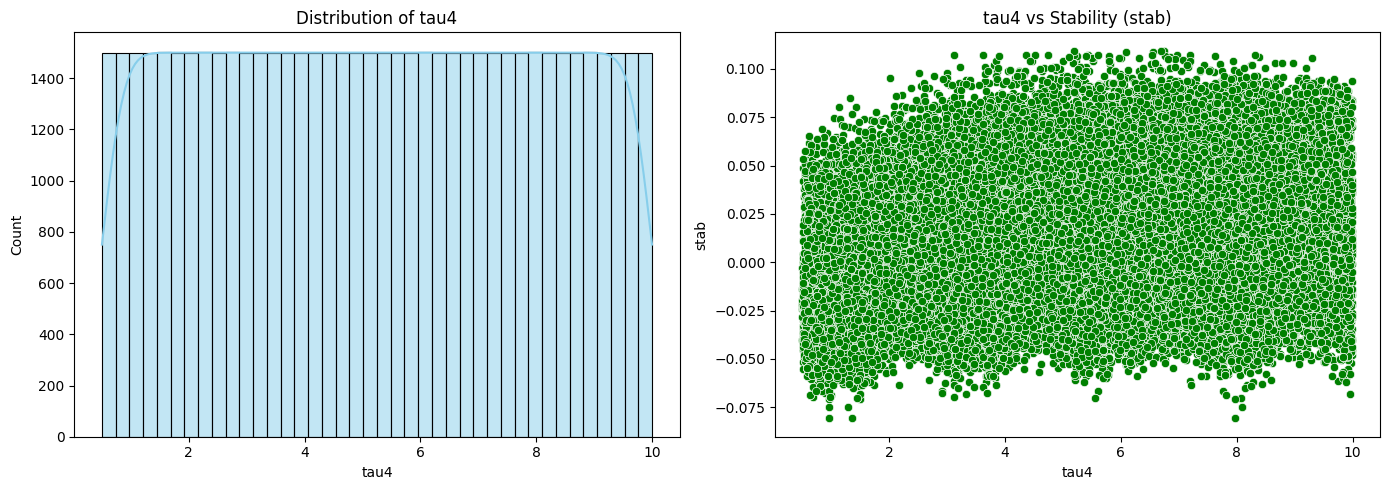

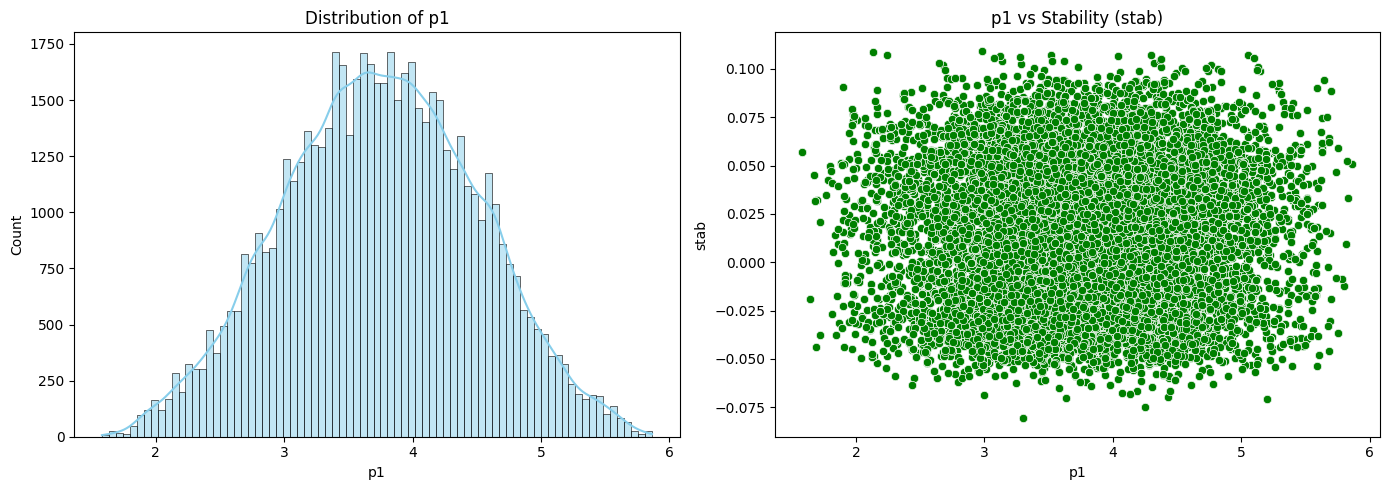

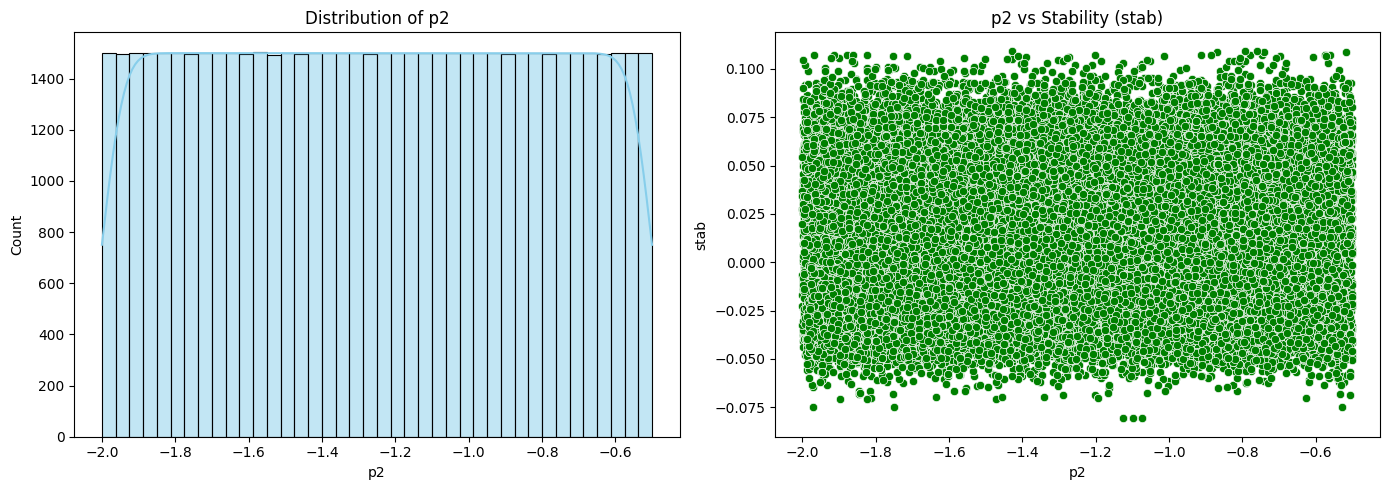

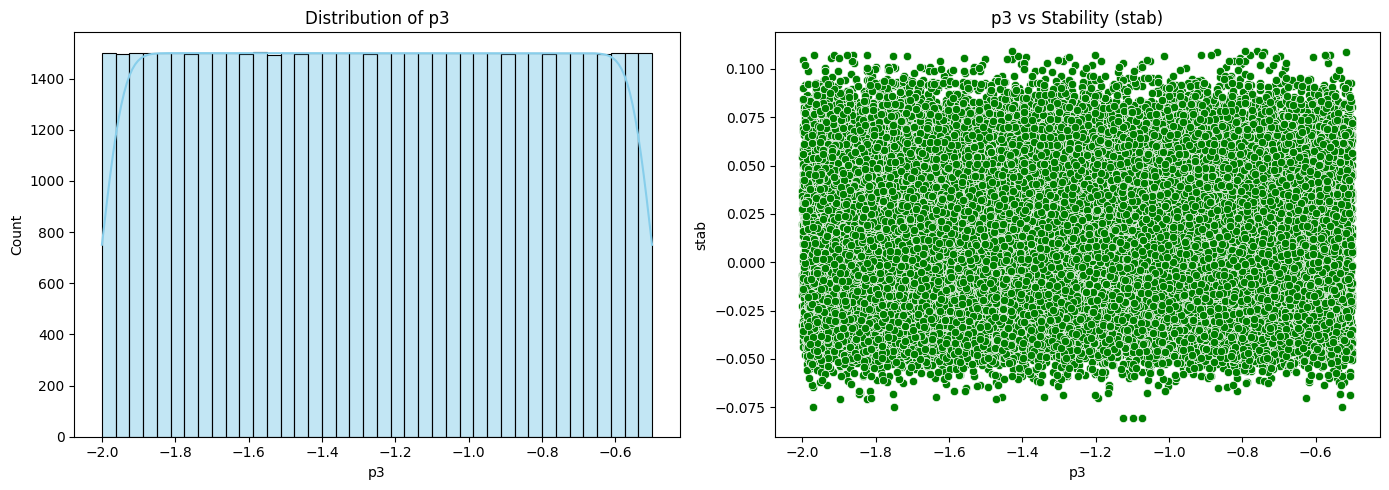

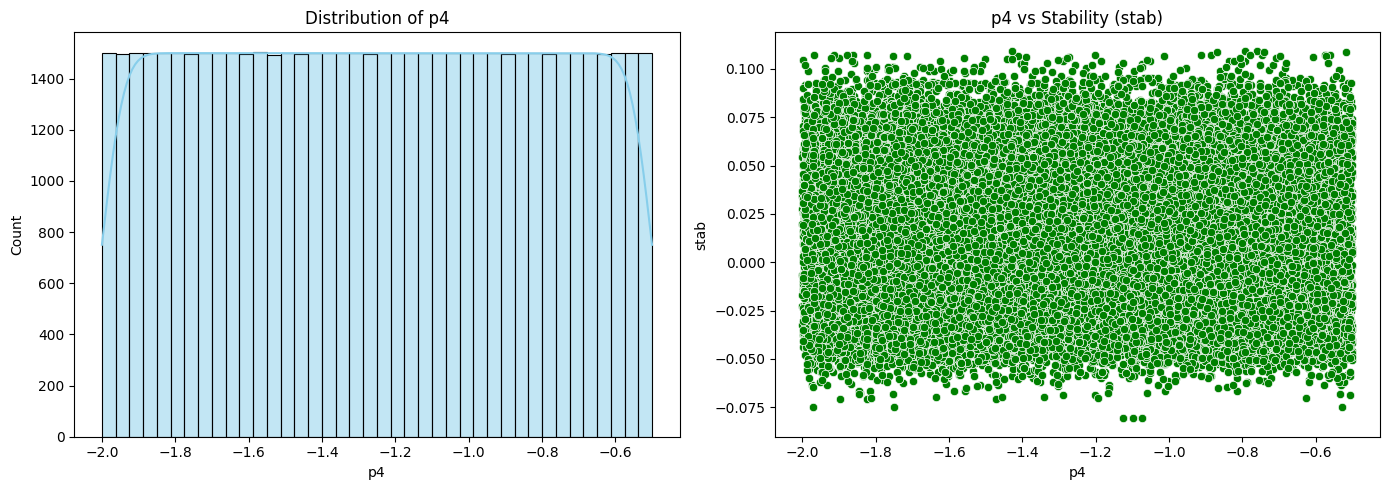

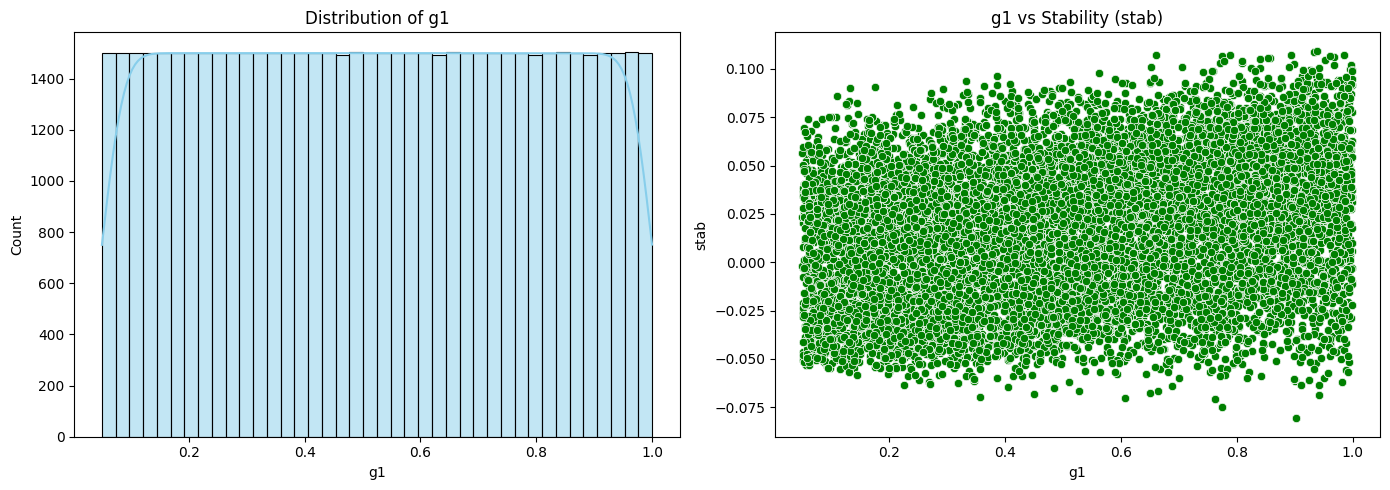

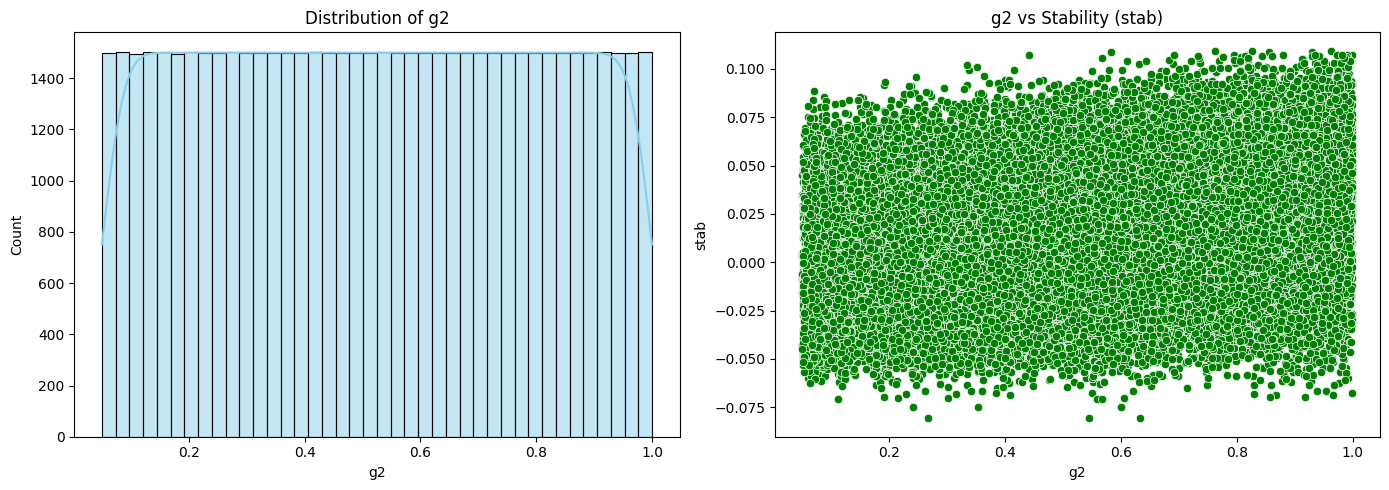

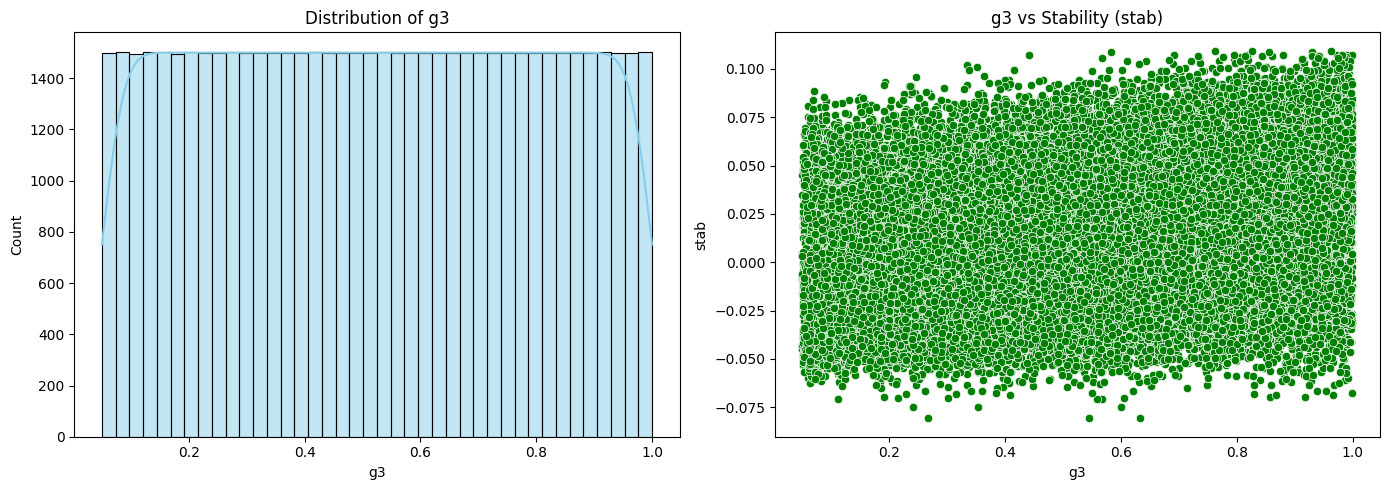

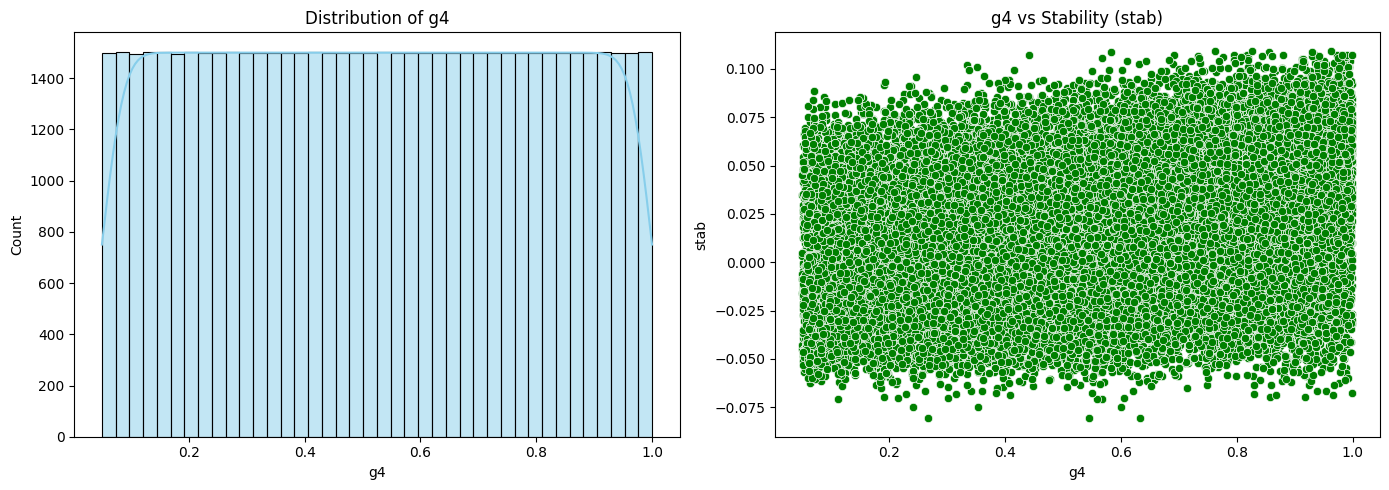

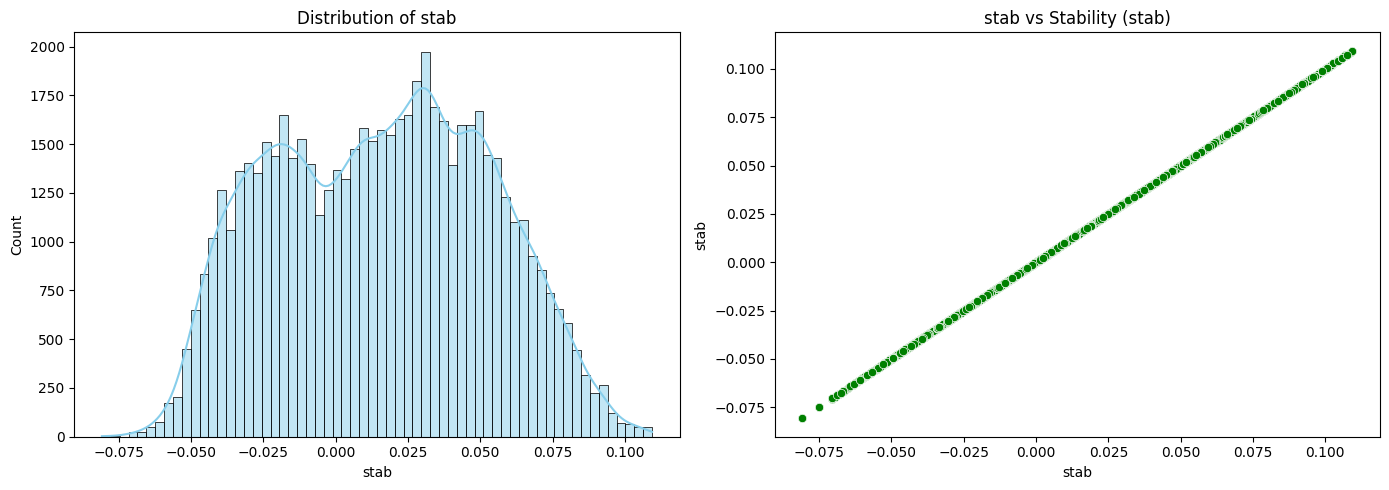

In [ ]:
 #Distribution of all the data with respect to stability

# Set the color palette
sns.set_palette("Set2")

# Loop through each column in the data (excluding 'stabf' if it exists)
for column in data.columns[:-1]:  # Assuming 'stabf' is the last column
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(data[column], ax=axes[0], color='skyblue', kde=True)
    axes[0].set_title(f'Distribution of {column}')

    # Scatter plot
    sns.scatterplot(x=data[column], y=data['stab'], ax=axes[1], color='green')
    axes[1].set_title(f'{column} vs Stability (stab)')

    # Adjust layout
    plt.tight_layout()
    plt.show()

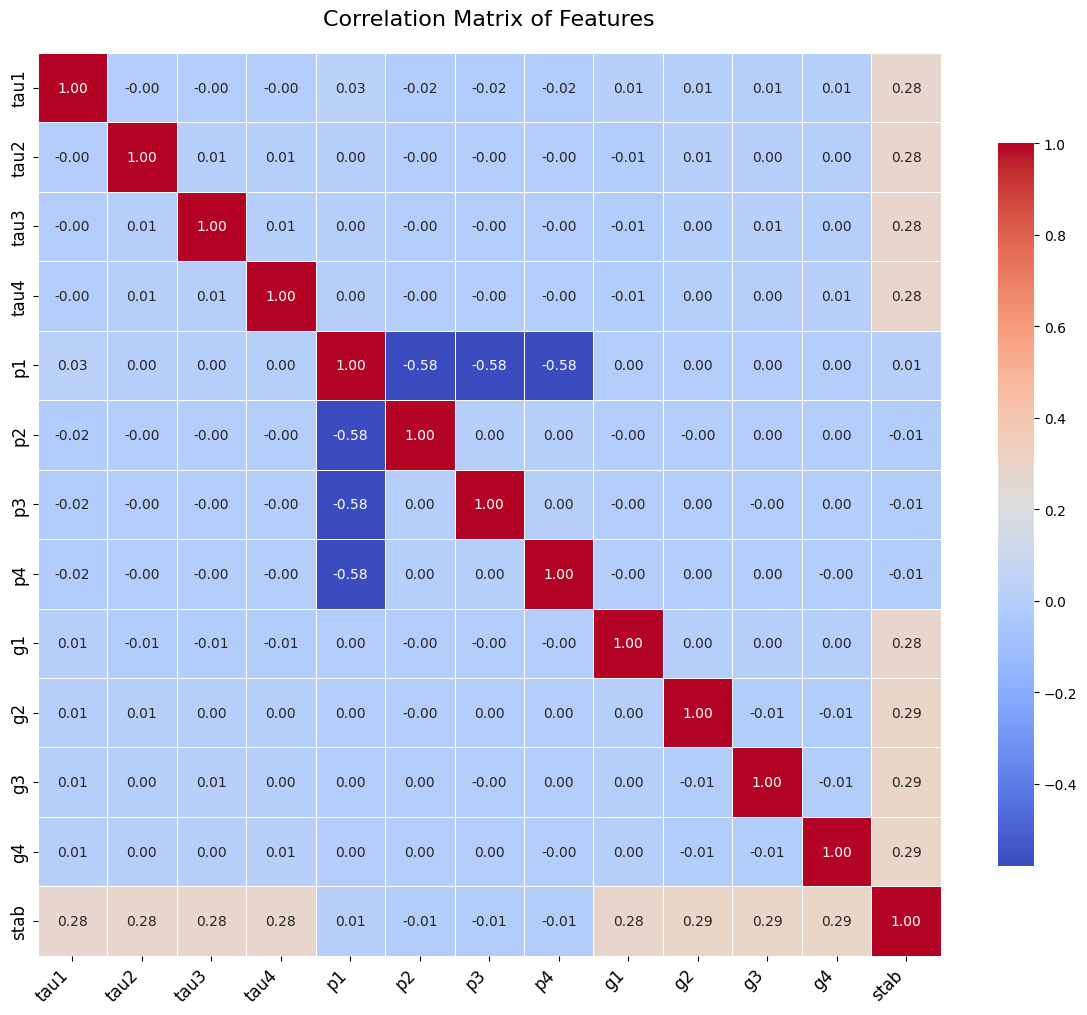

In [ ]:
# Compute the correlation matrix excluding 'stabf' if it's the last column
corr_data = data.iloc[:, :-1].corr()

# Create a larger figure for better visibility
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with improved annotations
sns.heatmap(corr_data,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",  # Display correlations with 2 decimal points
            linewidths=0.5,  # Add slight gridlines for separation
            square=True,  # Make heatmap cells square
            cbar_kws={"shrink": 0.8},  # Shrink colorbar slightly
            ax=ax)

# Add titles and labels
ax.set_title('Correlation Matrix of Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for clarity
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
data['stabf'] = data['stabf'].map({'unstable': 0, 'stable': 1})
data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  4.329398  2.922381  3.812439  4.889527  2.976282 -0.580791 -1.670782   
1  1.505885  3.894798  9.429076  9.028299  4.539770 -1.944415 -1.306711   
2  5.676195  1.589124  4.374007  9.746163  2.490323 -1.124102 -0.835475   
3  6.599849  3.272397  6.788573  4.996733  4.176063 -0.940304 -1.384814   
4  8.318815  9.943342  1.992320  7.010092  4.588462 -1.772568 -1.149099   

         p4        g1        g2        g3        g4      stab  stabf  
0 -0.724708  0.081347  0.931304  0.416173  0.359207  0.001675      0  
1 -1.288644  0.931961  0.651021  0.357534  0.309457 -0.031472      1  
2 -0.530746  0.472828  0.658319  0.116294  0.324219 -0.029357      1  
3 -1.850945  0.409672  0.269575  0.863755  0.284555  0.037729      0  
4 -1.666795  0.269630  0.302074  0.219025  0.440237 -0.001916      1

In [ ]:
X, y = data.drop(columns = ['stab', 'stabf']), data['stabf']
X.shape, y.shape

((60000, 12), (60000,))

In [ ]:
# Normalization

X_norm = X.copy()

for column in X_norm.columns:
  X_norm[column] = (X_norm[column] - X_norm[column].mean()) / X_norm[column].std()


X_norm.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.335688 -0.848741 -0.524191 -0.131443 -1.028704  1.545456 -0.971746   
1 -1.365253 -0.494160  1.523855  1.377716  1.050047 -1.603667 -0.130967   
2  0.155408 -1.334899 -0.319421  1.639477 -1.674816  0.290746  0.957296   
3  0.492208 -0.721112  0.561024 -0.092351  0.566476  0.715206 -0.311336   
4  1.119011  1.711376 -1.187878  0.641798  1.114785 -1.206807  0.233019   

         p4        g1        g2        g3        g4  
0  1.213098 -1.617730  1.481545 -0.396828 -0.604549  
1 -0.089245  1.483937  0.459521 -0.610648 -0.785957  
2  1.661029 -0.190239  0.486134 -1.490306 -0.732129  
3 -1.387811 -0.420529 -0.931381  1.235235 -0.876757  
4 -0.962538 -0.931176 -0.812878 -1.115707 -0.309081

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 12), (12000, 12), (48000,), (12000,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix:\n", conf_matrix_logreg)

Logistic Regression Accuracy: 81.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      7720
           1       0.76      0.69      0.72      4280

    accuracy                           0.81     12000
   macro avg       0.80      0.78      0.79     12000
weighted avg       0.81      0.81      0.81     12000


Confusion Matrix:
 [[6777  943]
 [1334 2946]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:\n", conf_matrix_nb)

Naive Bayes Accuracy: 82.92%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      7720
           1       0.83      0.66      0.73      4280

    accuracy                           0.83     12000
   macro avg       0.83      0.79      0.80     12000
weighted avg       0.83      0.83      0.82     12000


Confusion Matrix:
 [[7122  598]
 [1452 2828]]


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

SVM Accuracy: 97.79%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7720
           1       0.98      0.96      0.97      4280

    accuracy                           0.98     12000
   macro avg       0.98      0.97      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 94.70%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid

param_grid = {
    'n_estimators': [100,200,500,1000],
    'max_depth': [10,20,30,40],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['log2', 'sqrt']
}

# Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random_search.best_params_)

# Predict and evaluate
y_pred_rf_random = rf_random_search.predict(X_test)
accuracy_rf_random = accuracy_score(y_test, y_pred_rf_random)
print(f"Random Forest Accuracy with RandomizedSearchCV: {accuracy_rf_random * 100:.2f}%")

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Random Forest Accuracy with RandomizedSearchCV: 95.07%


In [ ]:
! pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01, random_state = 42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
# Use the 'predict' method instead of calling the object directly
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) # Also ensure you're using the correct predicted values
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

XGBoost Accuracy: 87.83%


In [ ]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
                                       n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", xgb_random_search.best_params_)

# Predict and evaluate
y_pred_xgb_random = xgb_random_search.predict(X_test)
accuracy_xgb_random = accuracy_score(y_test, y_pred_xgb_random)
print(f"XGBoost Accuracy after RandomizedSearchCV: {accuracy_xgb_random * 100:.2f}%")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}
XGBoost Accuracy after RandomizedSearchCV: 98.93%


In [ ]:
X_train1, y_train1 = X_norm[:42000], y[:42000]
X_val1, y_val1 = X_norm[42000:51000], y[42000:51000]
X_test1, y_test1 = X_norm[51000:], y[51000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((42000, 12), (42000,), (9000, 12), (9000,), (9000, 12), (9000,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the Sequential model
classifier = Sequential()

# Input layer and first hidden layer with Batch Normalization
classifier.add(Dense(units=128, activation='relu', input_dim=12))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
classifier.add(Dense(units=64, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

# Third hidden layer
classifier.add(Dense(units=32, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

# Output layer for binary classification
classifier.add(Dense(units=1, activation='sigmoid'))

# compile the model
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to stop training if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model summary
classifier.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Fit the model with early stopping
history = classifier.fit(X_train1, y_train1,
                         validation_data=(X_val1, y_val1),
                         epochs=100,
                         batch_size=32,
                         callbacks=[early_stopping])

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7824 - loss: 0.4467 - val_accuracy: 0.9364 - val_loss: 0.1717
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8877 - loss: 0.2575 - val_accuracy: 0.9484 - val_loss: 0.1423
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9046 - loss: 0.2241 - val_accuracy: 0.9550 - val_loss: 0.1257
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9082 - loss: 0.2130 - val_accuracy: 0.9604 - val_loss: 0.1179
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9175 - loss: 0.2014 - val_accuracy: 0.9599 - val_loss: 0.1112
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9224 - loss: 0.1870 - val_accuracy: 0.9636 - val_loss: 0.1067
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9268 - loss: 0.1811 - val_accuracy: 0.9668 - val_loss: 0.0990
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9287 - lo

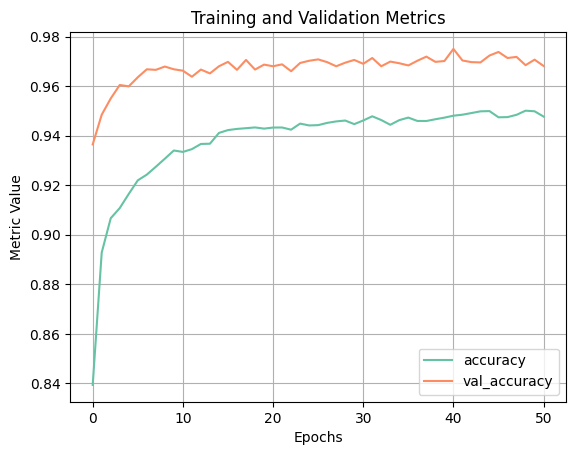

In [ ]:
# Convert the history object to a DataFrame
hist_data = pd.DataFrame(history.history)

# Drop the 'loss' and 'val_loss' columns
hist_data.drop(columns=['loss', 'val_loss'], inplace=True)

# Plot the remaining metrics (e.g., 'accuracy' and 'val_accuracy')
hist_data.plot()

# Show the plot
plt.title("Training and Validation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.grid(True)
plt.show()

In [ ]:
# Initialize variables to store the best results
best_threshold = 0
best_accuracy = 0
best_cm = None

# Make predictions on the test set (as probabilities)
Y_predicted_prob = classifier.predict(X_test1)

# Loop through different thresholds from 0.1 to 1.0
for threshold in np.arange(0.1, 1.1, 0.1):  # Start at 0.1, increment by 0.1 until 1.0
    # Convert probabilities to binary predictions (0 or 1) using the current threshold
    Y_predicted = (Y_predicted_prob >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test1, Y_predicted)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test1, Y_predicted)

    # If the current accuracy is better than the previous best, update the best results
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_cm = cm

# Print the best results
print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print("Best Confusion Matrix:")
best_cm_df = pd.DataFrame(best_cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(best_cm_df)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best Threshold: 0.5
Best Accuracy: 97.37%
Best Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         5689           94
Actual 1          143         3074


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_models(models_dict, X_test, Y_test):
    """
    This function computes accuracy, precision, recall, F1-score, and confusion matrix for each model.

    Args:
    - models_dict: A dictionary where the key is the model name and the value is the trained model.
    - X_test: Test features.
    - Y_test: True labels for the test set.

    Returns:
    - A pandas DataFrame containing the evaluation metrics for all models.
    """
    # Create lists to store results for each model
    model_names = []
    accuracies = []
    precisions_0 = []
    recalls_0 = []
    f1_scores_0 = []
    precisions_1 = []
    recalls_1 = []
    f1_scores_1 = []
    confusion_matrices = []

    # Iterate over each model and compute the metrics
    for model_name, model in models_dict.items():
        # Get predictions from the model
        Y_predicted = model.predict(X_test)
        Y_predicted = (Y_predicted >= 0.5).astype(int)  # For classifiers like DNN that return probabilities

        # Compute the accuracy
        accuracy = accuracy_score(y_test, Y_predicted)

        # Get classification report as a dictionary
        report = classification_report(y_test, Y_predicted, output_dict=True)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, Y_predicted)

        # Append results to lists
        model_names.append(model_name)
        accuracies.append(accuracy * 100)  # Convert to percentage
        precisions_0.append(report['0']['precision'])
        recalls_0.append(report['0']['recall'])
        f1_scores_0.append(report['0']['f1-score'])
        precisions_1.append(report['1']['precision'])
        recalls_1.append(report['1']['recall'])
        f1_scores_1.append(report['1']['f1-score'])
        confusion_matrices.append(cm)

    # Create a DataFrame to hold the results
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy (%)': accuracies,
        'Precision (Class 0)': precisions_0,
        'Recall (Class 0)': recalls_0,
        'F1-Score (Class 0)': f1_scores_0,
        'Precision (Class 1)': precisions_1,
        'Recall (Class 1)': recalls_1,
        'F1-Score (Class 1)': f1_scores_1,
        'Confusion Matrix': confusion_matrices
    })

    return metrics_df

In [ ]:
models_dict = {
     'Logistic Regression': logreg,
     'Naive Bayes': nb_classifier,
     'SVM': svm_classifier,
     'Random Forest': rf_random_search,
     'XGBoost': xgb_random_search,
     'Deep Neural Network': classifier }

metrics_df = evaluate_models(models_dict, X_test, y_test)
metrics_df

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Model  Accuracy (%)  Precision (Class 0)  Recall (Class 0)  \
0  Logistic Regression     81.025000             0.835532          0.877850   
1          Naive Bayes     82.916667             0.830651          0.922539   
2                  SVM     97.791667             0.978560          0.987306   
3        Random Forest     95.066667             0.952399          0.971891   
4              XGBoost     98.933333             0.989301          0.994171   
5  Deep Neural Network     97.641667             0.975816          0.987824   

   F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.856168             0.757521          0.688318   
1            0.874187             0.825452          0.660748   
2            0.982913             0.976728          0.960981   
3            0.962046             0.947356          0.912383   
4            0.991730             0.989392          0.980607   
5            0.981783             0.977539          0.955841   

   F1-Score (Class 1)             Confusion Matrix  
0            0.721263  [[6777, 943], [1334, 2946]]  
1            0.733974  [[7122, 598], [1452, 2828]]  
2            0.968790    [[7622, 98], [167, 4113]]  
3            0.929541   [[7503, 217], [375, 3905]]  
4            0.984980     [[7675, 45], [83, 4197]]  
5            0.966568    [[7626, 94], [189, 4091]]

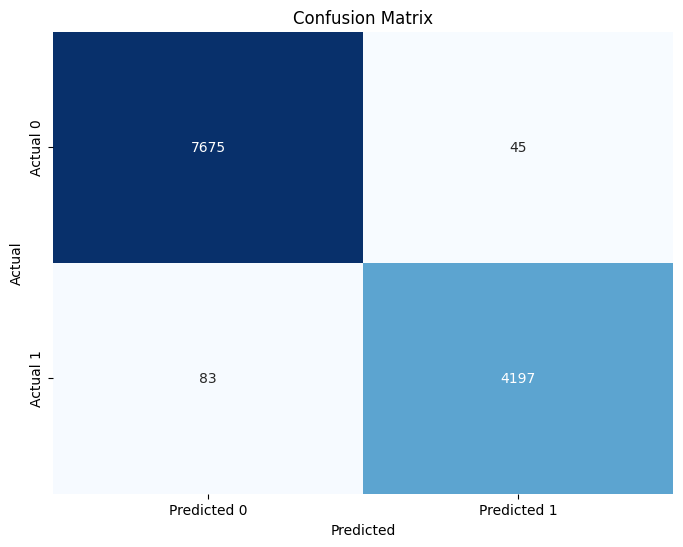

In [ ]:

y_predicted = xgb_random_search.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

# Plotting confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

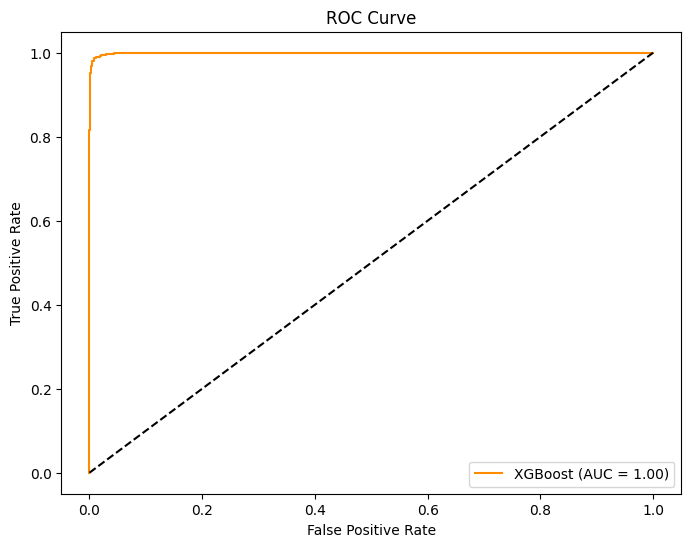

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_predicted_prob = xgb_random_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob)
roc_auc = roc_auc_score(y_test, y_predicted_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

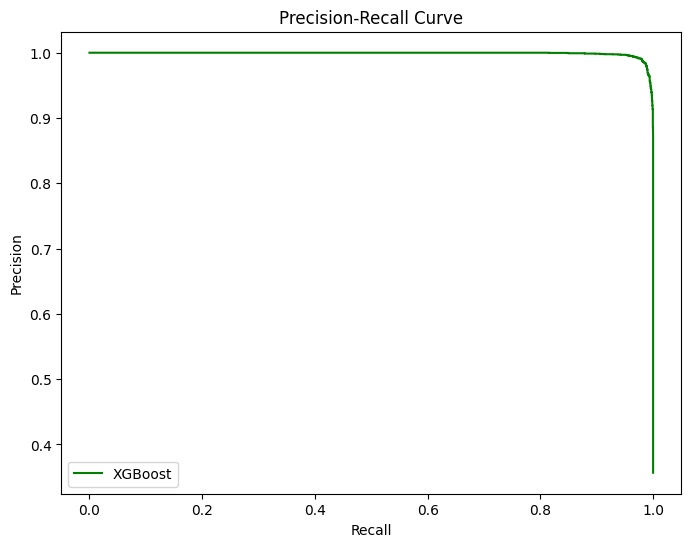

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_predicted_prob)

# Plot precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, label='XGBoost', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()